<a href="https://colab.research.google.com/github/Dariienko/Vodafone-EDA/blob/master/EDA_for_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis for Titanic dataset

In [ ]:
# import kagglehub

# # Download latest version

# path = kagglehub.dataset_download("brendan45774/test-file")

# print("Path to dataset files:", path)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/titanic/train.csv"

## Data loading

In [ ]:
data = pd.read_csv(path) # get dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.columns # columns names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.index # rows "names"

RangeIndex(start=0, stop=891, step=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Descriptive statistics

In [ ]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
data['Pclass'].value_counts(normalize=True)

,proportion
Pclass,
3,0.551066
1,0.242424
2,0.206510


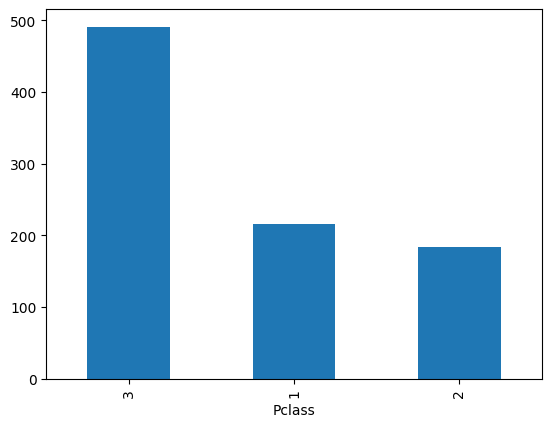

In [ ]:
data['Pclass'].value_counts().plot(kind='bar')
plt.show()

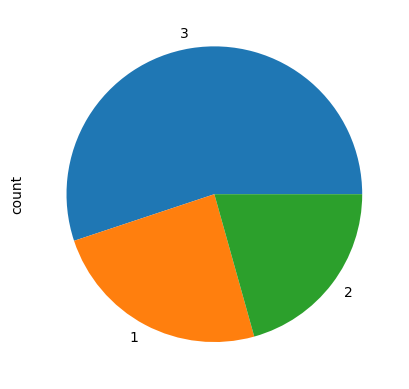

In [ ]:
data['Pclass'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
data['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


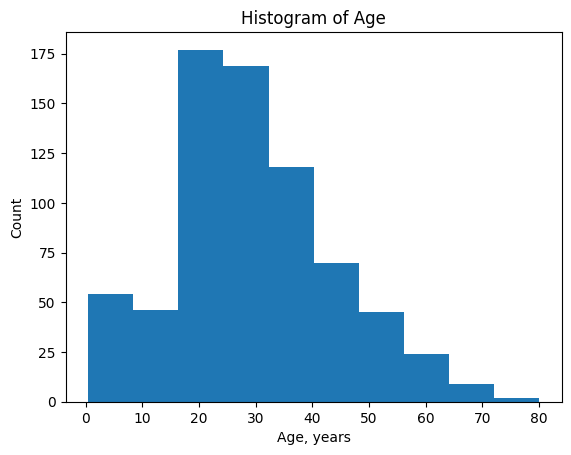

In [ ]:
plt.hist(data['Age'])
plt.xlabel('Age, years')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()

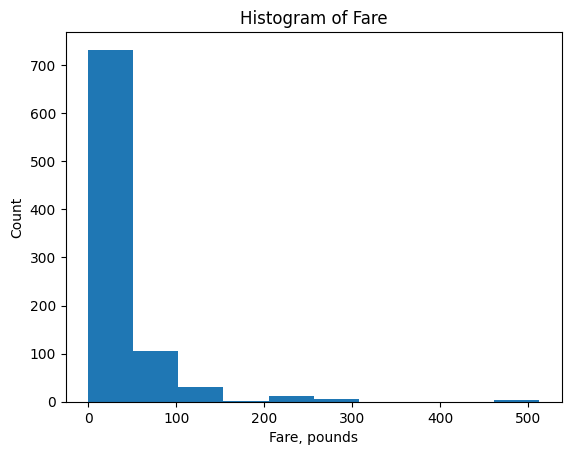

In [ ]:
plt.hist(data['Fare'])
plt.xlabel('Fare, pounds')
plt.ylabel('Count')
plt.title('Histogram of Fare')
plt.show()

In [ ]:
data['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


## Aggregating, grouping, pivoting, ...

In [ ]:
data.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
data.groupby('Sex')['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
data[ data['Sex']=='female' ]['Survived'].value_counts()

,count
Survived,
1,233
0,81


In [ ]:
data[ data['Sex']=='male' ]['Survived'].value_counts()

,count
Survived,
0,468
1,109


In [ ]:
data.pivot_table(index='Embarked', columns='Pclass', values='Survived', aggfunc='mean')

Pclass,1,2,3
Embarked,,,
C,0.694118,0.529412,0.378788
Q,0.500000,0.666667,0.375000
S,0.582677,0.463415,0.189802


In [ ]:
data.pivot_table(index='Pclass', columns='Sex', values='PassengerId', aggfunc='count')

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


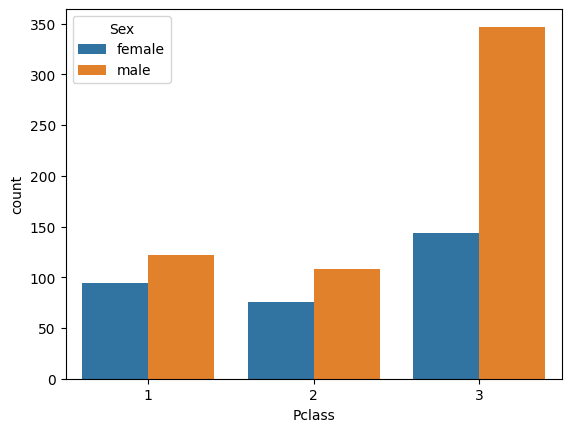

In [ ]:
import seaborn as sns
sns.countplot(data=data, x="Pclass", hue="Sex")
plt.show()

In [ ]:
data.groupby('Survived')['Age'].agg(['min', 'mean', 'median', 'max'])

,min,mean,median,max
Survived,,,,
0,1.00,30.626179,28.0,74.0
1,0.42,28.343690,28.0,80.0


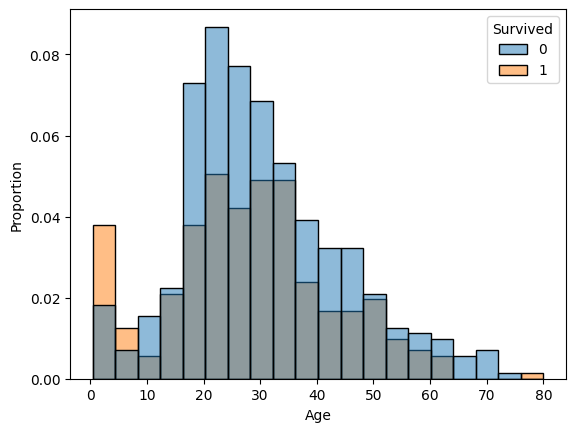

In [ ]:
sns.histplot(data=data, x="Age", hue="Survived", stat="proportion")
plt.show()

In [ ]:
# Pclass vs. Survived
data['Pclass'].corr(data['Survived'])

-0.33848103596101475

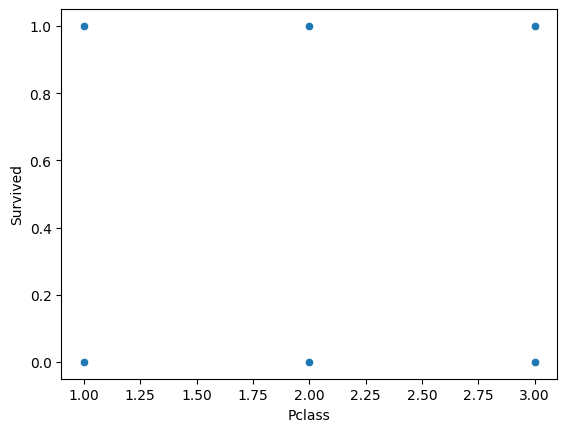

In [ ]:
sns.scatterplot(data=data, x="Pclass", y="Survived")
plt.show()

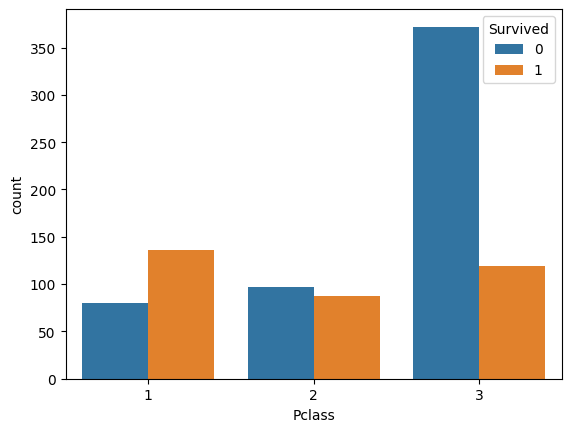

In [ ]:
sns.countplot(data=data, x="Pclass", hue="Survived")
plt.show()

In [ ]:
data['Pclass'].corr(data['Survived'], method='spearman')

-0.33966793665005257

In [ ]:
data['Pclass'].corr(data['Survived'], method='kendall')

-0.3235331843940954

In [ ]:
from scipy.stats import pearsonr, spearmanr
print(spearmanr(data['Pclass'], data['Survived']))

SignificanceResult(statistic=-0.33966793665005257, pvalue=1.6876081409966055e-25)


$H_0$: $r=0$ (no correlation)

$H_1$: $r\neq 0$ (there is correlation)


In [ ]:
print(spearmanr(data['Age'], data['Survived'], nan_policy='omit'))

SignificanceResult(statistic=-0.052565300044694487, pvalue=0.16058855181140086)


In [ ]:
print(spearmanr(data['Sex'], data['Survived'], nan_policy='omit'))

SignificanceResult(statistic=-0.5433513806577551, pvalue=1.4060661308802594e-69)


In [ ]:
print(spearmanr(data['Pclass'], data['Fare'], nan_policy='omit'))

SignificanceResult(statistic=-0.6880316726256098, pvalue=6.194553731421917e-126)


In [ ]:
data.groupby('Embarked')['Survived'].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu
sample_c = data[data['Embarked']=='C']['Survived']
sample_q = data[data['Embarked']=='Q']['Survived']
print(ttest_ind(sample_c, sample_q))

TtestResult(statistic=2.401059420803492, pvalue=0.017100079516725316, df=243.0)


In [ ]:
sample_s = data[data['Embarked']=='S']['Survived']
print(ttest_ind(sample_c, sample_s))

TtestResult(statistic=5.22633862691222, pvalue=2.2014370315889943e-07, df=810.0)


In [ ]:
print(ttest_ind(sample_q, sample_s))

TtestResult(statistic=0.9193915523685302, pvalue=0.3581991404268985, df=719.0)


In [ ]:
print(mannwhitneyu(sample_c, sample_q))
print(mannwhitneyu(sample_c, sample_s))
print(mannwhitneyu(sample_q, sample_s))

MannwhitneyuResult(statistic=7528.5, pvalue=0.01746208746702793)
MannwhitneyuResult(statistic=65814.0, pvalue=2.698987245390439e-07)
MannwhitneyuResult(statistic=26099.5, pvalue=0.3580232955011391)


#First Model | LR


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
temp_data = data[['Survived','Pclass','Sex','SibSp', 'Parch', 'Fare','Embarked']]
temp_data = temp_data.dropna()
temp_data.info()
temp_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.6+ KB


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [ ]:
temp_data = pd.get_dummies(temp_data, columns = ['Embarked'])

KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

In [ ]:
temp_data['Sex'] = temp_data['Sex'].map({'male': 0, 'female': 1})
temp_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,1,0,7.2500,False,False,True
1,1,1,1,1,0,71.2833,True,False,False
2,1,3,1,0,0,7.9250,False,False,True
3,1,1,1,1,0,53.1000,False,False,True
4,0,3,0,0,0,8.0500,False,False,True


In [ ]:
X = temp_data.drop('Survived',axis = 1)
y = temp_data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.25, random_state= 2025)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(X_valid)
print(y_pred[:10], 'Predition:')
print(y_valid.values[:10], 'Ground truth')

[0 0 0 0 1 0 0 0 0 0] Predition:
[0 1 0 0 0 0 1 0 1 1] Ground truth


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_valid, y_pred)
accuracy

0.695067264573991